In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.math import confusion_matrix
import keras

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('/homes/blkoobs/Documents/Jaar_3/Blok2/CasusD/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/homes/blkoobs/Documents/Jaar_3/Blok2/CasusD/data/fashion', kind='t10k')
X_train.shape

(60000, 784)

In [30]:
X_test.shape

(10000, 784)

Op het plaatje staat een "Sneaker".


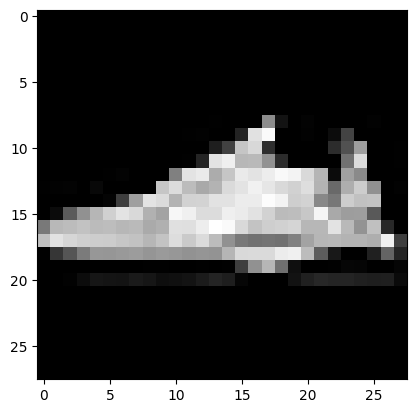

In [31]:
idx = np.random.choice(60_000)
img = np.array(X_train[idx], dtype='float')
label = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}
plt.imshow(img.reshape(28,28), cmap='gray')
print(f'Op het plaatje staat een "{label[y_train[idx]]}".')

In [33]:
X_train = X_train.reshape(-1, 28, 28)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

/homes/blkoobs/Documents/Jaar_3/Blok2/.llm/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
#fit model
hist = model.fit(X_train, y_train, epochs=24)

Epoch 1/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4436 - sparse_categorical_accuracy: 0.8489
Epoch 2/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8442
Epoch 3/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4297 - sparse_categorical_accuracy: 0.8516
Epoch 4/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4406 - sparse_categorical_accuracy: 0.8475
Epoch 5/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4443 - sparse_categorical_accuracy: 0.8473
Epoch 6/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4314 - sparse_categorical_accuracy: 0.8514
Epoch 7/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4255 - sparse_categorical_accuracy: 0.8532
Epoch 8/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4356 - sparse_categorical_accuracy: 0.8497
Epoch 9/24
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4237 - sparse_categorical_accuracy: 0.8523
Epoch 10/24
1875/1875 ━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(50.722222222222214, 0.5, 'True')

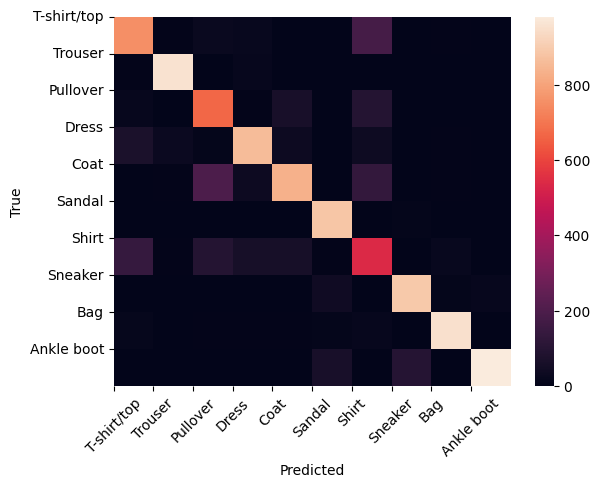

In [74]:
import pandas as pd
import seaborn as sn

X_test = X_test.reshape(-1, 28, 28)
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

y_pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(np.argmax(y_pred, axis=1), y_test))

sn.heatmap(cm, annot=False)

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.yticks(ticks=range(len(labels)), labels=labels, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("True")

In [43]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
l = y_pred - y_test
print(f'Test accuracy: {len([x for x in l if x == 0])/ len(y_pred)}')

y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)
l = y_pred - y_train
print(f'Train accuracy: {len([x for x in l if x == 0])/ len(y_pred)}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test accuracy: 0.8316
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train accuracy: 0.8559333333333333


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


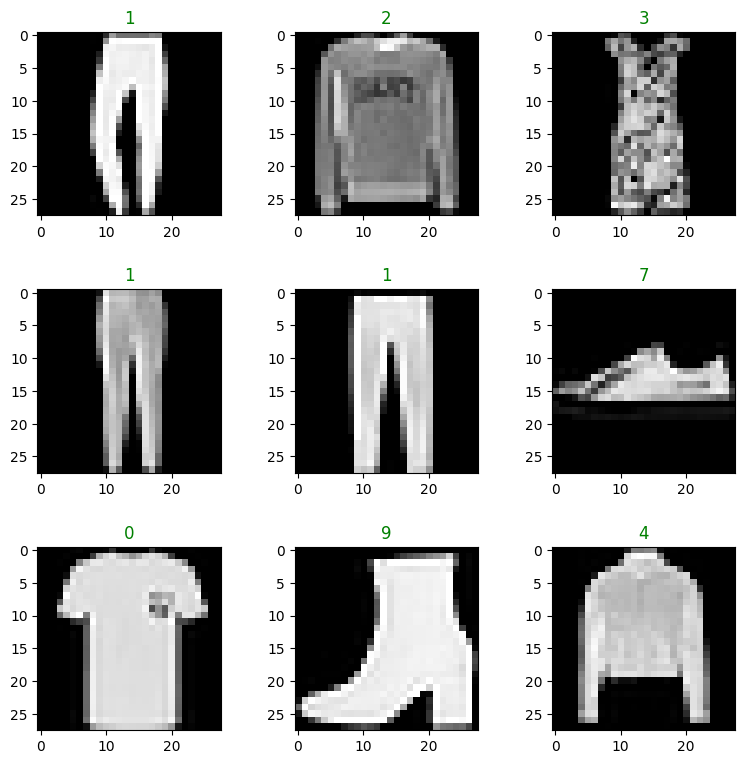

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for c in range(3):
    for r in range(3):
        idx = np.random.choice(len(X_test))
        img = X_test[idx]

        #Predict
        label_y = y_test[idx]
        label_p = np.argmax(model.predict(img.reshape(1, 28, 28)), axis=1)[0]

        #Show image
        ax[c, r].imshow(img, cmap='gray')
        if label_y == label_p:
            ax[c, r].set_title(f"{label_y}", color='green')
        else:
            ax[c, r].set_title(f"{label_y} ({label_p})", color='red')
fig.tight_layout(pad=2)
plt.show()


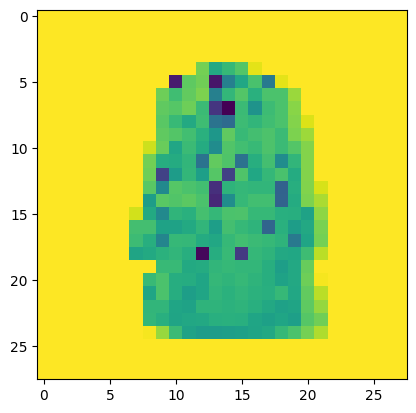

In [38]:
import cv2
im = cv2.imread('/homes/blkoobs/Documents/Jaar_3/Blok2/CasusD/opdracht1/6D67F6B9-8E61-494F-953B-2E61CAF0A1B1.webp')
im = im[:,:,1]
im = cv2.resize(im, (28, 28))
plt.imshow(im)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1.0000000000235152
[1.2077834568329383e-20, 1.8103438199697505e-31, 1.7420468698992086e-16, 7.979057794172557e-30, 2.4129191683018183e-21, 6.238973581029412e-20, 2.499368175429642e-16, 3.0773260192142407e-16, 1.0, 2.3514497640708676e-11]


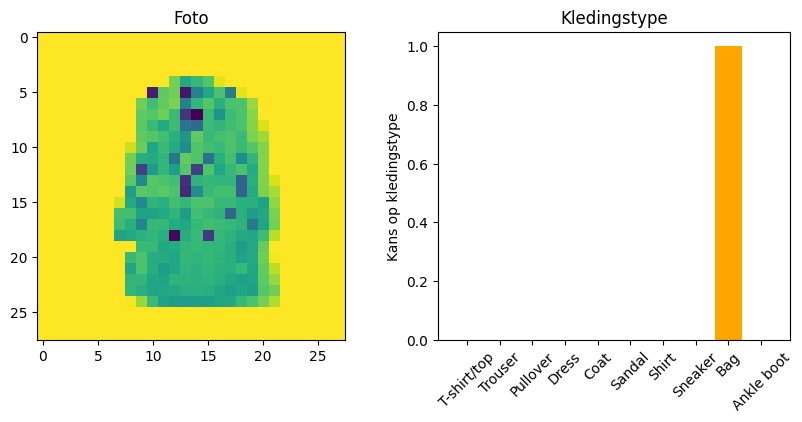

In [76]:
#X_test[0:1].shape
x = model.predict(np.array([im]))
print(sum(x[0]))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

numbers = range(10)
counts = x[0].tolist()
print(counts)

plt.xticks(numbers, ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], rotation=45)
ax[1].bar(numbers, counts, color='orange')
ax[1].set_ylabel('Kans op kledingstype')
ax[1].set_title('Kledingstype')
ax[0].set_title('Foto')
ax[0].imshow(im)

plt.show()